<a href="https://colab.research.google.com/github/saumilhj/projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE CLASSIFICATION (CHEETAH/LION)**

Dataset from Kaggle: https://www.kaggle.com/datasets/gpiosenka/cats-in-the-wild-image-classification?resource=download

I have taken only the cheetah and lion images for binary classification using an artificial neural network

### Import libraries

In [1]:
import numpy as np
import pandas as pd

from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

### Custom function

There are 228 cheetah and lion images and this function has been created to resize the images, convert them to grayscale and create a dataframe of grayscale pixel values

In [2]:
def create_img_dataframe(df, folder, resize_tuple, max):  
  # Tuple to resize
  resize_dims = resize_tuple
  for i in range(1,max+1):
    # Open image with PIL for size and scale change
    img = Image.open(f'{folder}/{i}.jpg')
    img = img.resize(resize_dims)
    img = img.convert('L')
    # Convert image to array
    img_array = np.array(img).flatten()
    img_col = pd.Series(img_array)
    df = pd.concat([df, img_col], axis=1, ignore_index=True)
  # Transpose dataframe to get every row as pixel values
  return df.transpose()

### Making and combining dataframes

In [3]:
# Fix the image size needed in this tuple
resizer = (64, 64)

In [4]:
df_cheetah = pd.DataFrame()
df_cheetah = create_img_dataframe(df_cheetah, folder='Cheetah', resize_tuple=resizer, max=228)
df_cheetah = df_cheetah / 255
df_cheetah['is_cheetah'] = 1

In [5]:
df_lion = pd.DataFrame()
df_lion = create_img_dataframe(df_lion, folder='Lion', resize_tuple=resizer, max=228)
df_lion =  df_lion / 255
df_lion['is_cheetah'] = 0

In [6]:
df_cheetah_lion = pd.concat([df_cheetah, df_lion], ignore_index=True)
df_cheetah_lion.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,is_cheetah
0,0.572549,0.549020,0.564706,0.560784,0.639216,0.635294,0.658824,0.580392,0.584314,0.639216,...,0.294118,0.380392,0.435294,0.431373,0.400000,0.478431,0.572549,0.611765,0.600000,1
1,0.666667,0.631373,0.592157,0.576471,0.639216,0.658824,0.603922,0.580392,0.627451,0.654902,...,0.780392,0.443137,0.423529,0.623529,0.600000,0.505882,0.552941,0.549020,0.529412,1
2,0.411765,0.286275,0.223529,0.196078,0.200000,0.239216,0.160784,0.141176,0.152941,0.149020,...,0.298039,0.294118,0.266667,0.262745,0.396078,0.415686,0.372549,0.349020,0.450980,1
3,0.101961,0.098039,0.152941,0.239216,0.141176,0.141176,0.149020,0.164706,0.156863,0.145098,...,0.607843,0.607843,0.662745,0.647059,0.631373,0.647059,0.627451,0.658824,0.654902,1
4,0.341176,0.282353,0.223529,0.396078,0.349020,0.188235,0.164706,0.325490,0.203922,0.349020,...,0.733333,0.698039,0.733333,0.756863,0.694118,0.658824,0.635294,0.658824,0.698039,1


### Artificial Neural Network

In [7]:
X = df_cheetah_lion.drop(columns=['is_cheetah'])
y = df_cheetah_lion['is_cheetah']
# train and validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=20)

In [8]:
# Early stopping
early_stop = keras.callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

# Tensorflow model
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=[4096], activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005), loss=keras.losses.BinaryCrossentropy(), metrics=['binary_accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=500, callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 1s 26ms/step - loss: 0.6915 - binary_accuracy: 0.5073 - val_loss: 0.6848 - val_binary_accuracy: 0.5435
Epoch 2/500
13/13 [==============================] - 0s 10ms/step - loss: 0.6769 - binary_accuracy: 0.5805 - val_loss: 0.6791 - val_binary_accuracy: 0.6304
Epoch 3/500
13/13 [==============================] - 0s 8ms/step - loss: 0.6652 - binary_accuracy: 0.6122 - val_loss: 0.6725 - val_binary_accuracy: 0.5870
Epoch 4/500
13/13 [==============================] - 0s 8ms/step - loss: 0.6584 - binary_accuracy: 0.6537 - val_loss: 0.6646 - val_binary_accuracy: 0.5652
Epoch 5/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6558 - binary_accuracy: 0.6195 - val_loss: 0.6784 - val_binary_accuracy: 0.4783
Epoch 6/500
13/13 [==============================] - 0s 20ms/step - loss: 0.6557 - binary_accuracy: 0.6073 - val_loss: 0.6615 - val_binary_accuracy: 0.6304
Epoch 7/500
13/13 [==============================] - 0s 23ms/step -

<Axes: title={'center': 'Accuracy'}>

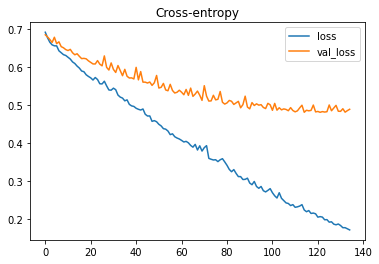

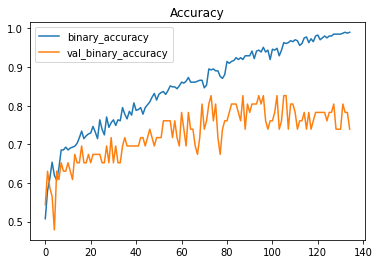

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

While training accuracy is more than 90 percent, validation accuracy settles close to 70 percent